#### aqui trabajaremos  los codigos del libro hand son machine learning e iremos probandon lo que encontremos en el libro, bases de datos etc.

###### 
* the Better Life Index data from the OECD’s website and stats about gross domestic
 * product (GDP) per capita from the IMF’s website.

In [11]:
!pip install xmltodict


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [21]:
import requests
import xmltodict
import json
import pandas as pd

# URL de la API
url = "https://sdmx.oecd.org/archive/rest/data/OECD,DF_BLI,/ISL+HUN+GRC+DEU+FRA+FIN+EST+DNK+CZE+CRI+COL+CHL+CAN+AUT+BEL+AUS.PS_REPH+SW_LIFS..MN+WMN?dimensionAtObservation=AllDimensions"

# Hacer la solicitud GET a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    xml_data = response.text  # Obtener datos en XML
    print("✅ Datos obtenidos en XML")

    # Convertir XML a un diccionario
    data_dict = xmltodict.parse(xml_data)

    # Convertir el diccionario a JSON
    json_data = json.dumps(data_dict, indent=4)

    # Guardar en un archivo JSON (Opcional)
    with open("oecd_data.json", "w", encoding="utf-8") as json_file:
        json_file.write(json_data)

    print("✅ XML convertido a JSON y guardado")

    # Explorar la estructura
    print(json_data[:500])  # Imprimir solo una parte para verificar
else:
    print(f"❌ Error en la solicitud: {response.status_code}")


✅ Datos obtenidos en XML
✅ XML convertido a JSON y guardado
{
    "message:GenericData": {
        "@xmlns:footer": "http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message/footer",
        "@xmlns:generic": "http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic",
        "@xmlns:message": "http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message",
        "@xmlns:common": "http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common",
        "@xmlns:xsi": "http://www.w3.org/2001/XMLSchema-instance",
        "@xmlns:xml": "http://www.w3.org/XML/


In [22]:
import json

# Cargar el JSON guardado
with open("oecd_data.json", "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

# Explorar las claves principales
print(data.keys())  # Para ver las claves del JSON


dict_keys(['message:GenericData'])


In [23]:
import json
import pandas as pd

# Cargar el JSON guardado
with open("oecd_data.json", "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

# Extraer la lista de observaciones
observations = data["message:GenericData"]["message:DataSet"]["generic:Obs"]

# Crear una lista para almacenar los datos transformados
data_list = []

# Recorrer cada observación y extraer datos
for obs in observations:
    obs_key = {dim["@id"]: dim["@value"] for dim in obs["generic:ObsKey"]["generic:Value"]}
    obs_value = obs["generic:ObsValue"]["@value"]  # Extrae el valor numérico
    obs_key["Value"] = obs_value  # Agregar la columna con el valor

    data_list.append(obs_key)

# Convertir la lista en un DataFrame
df = pd.DataFrame(data_list)

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
#df.to_csv("oecd_data_clean.csv", index=False)


  INEQUALITY LOCATION INDICATOR MEASURE Value
0         MN      HUN   SW_LIFS       L   6.3
1         MN      GRC   SW_LIFS       L     6
2         MN      DEU   SW_LIFS       L   7.4
3         MN      FRA   SW_LIFS       L   6.8
4         MN      FIN   SW_LIFS       L   7.7


In [24]:
df

,INEQUALITY,LOCATION,INDICATOR,MEASURE,Value
0,MN,HUN,SW_LIFS,L,6.3
1,MN,GRC,SW_LIFS,L,6
2,MN,DEU,SW_LIFS,L,7.4
3,MN,FRA,SW_LIFS,L,6.8
4,MN,FIN,SW_LIFS,L,7.7
...,...,...,...,...,...
59,MN,EST,PS_REPH,L,3.1
60,MN,CHL,PS_REPH,L,4.2
61,MN,ISL,PS_REPH,L,0.5
62,MN,ISL,SW_LIFS,L,7.4


In [26]:
# inspect dataset df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INEQUALITY  64 non-null     object
 1   LOCATION    64 non-null     object
 2   INDICATOR   64 non-null     object
 3   MEASURE     64 non-null     object
 4   Value       64 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [27]:
#transform column Value to numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INEQUALITY  64 non-null     object 
 1   LOCATION    64 non-null     object 
 2   INDICATOR   64 non-null     object 
 3   MEASURE     64 non-null     object 
 4   Value       64 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


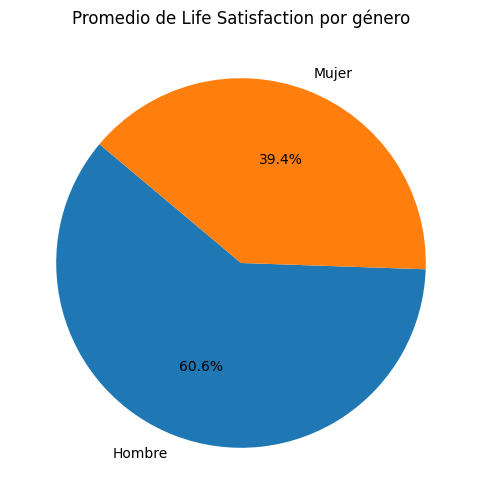

In [ ]:
# make a pi chart dividing the Value column and INEQUALITY column that represents the gender
import matplotlib.pyplot as plt

# Agrupar por género y calcular el promedio
df_grouped = df.groupby("INEQUALITY")["Value"].mean()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(df_grouped, labels=["Hombre", "Mujer"], autopct="%1.1f%%", startangle=140)
plt.title("Promedio de Life Satisfaction por género")
plt.show()

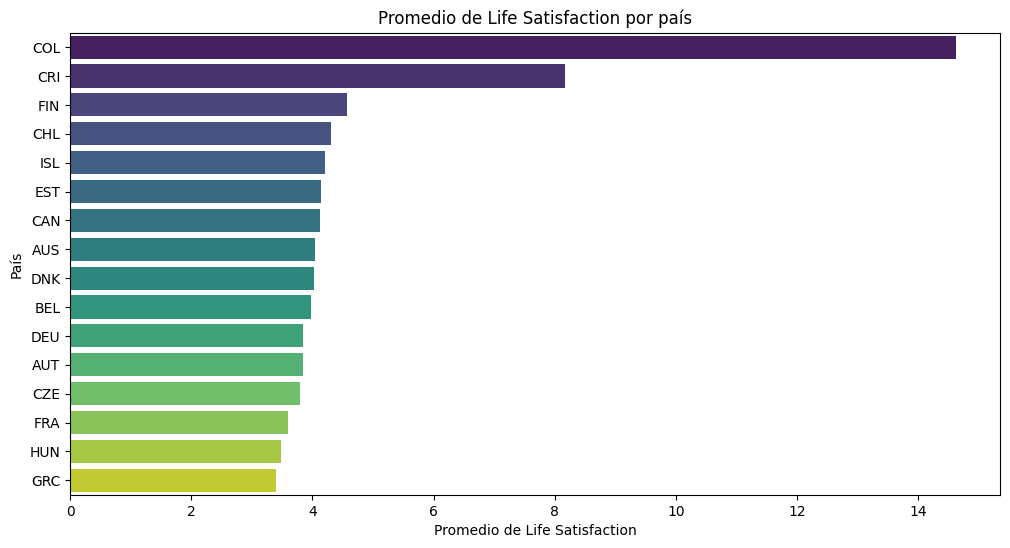

In [32]:
#make bar chart dividing the Value column and INEQUALITY column that by the country
import seaborn as sns

# Agrupar por país y calcular el promedio
df_grouped = df.groupby("LOCATION")["Value"].mean().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped.values, y=df_grouped.index, palette="viridis")
plt.xlabel("Promedio de Life Satisfaction")
plt.ylabel("País")
plt.title("Promedio de Life Satisfaction por país")
plt.show()

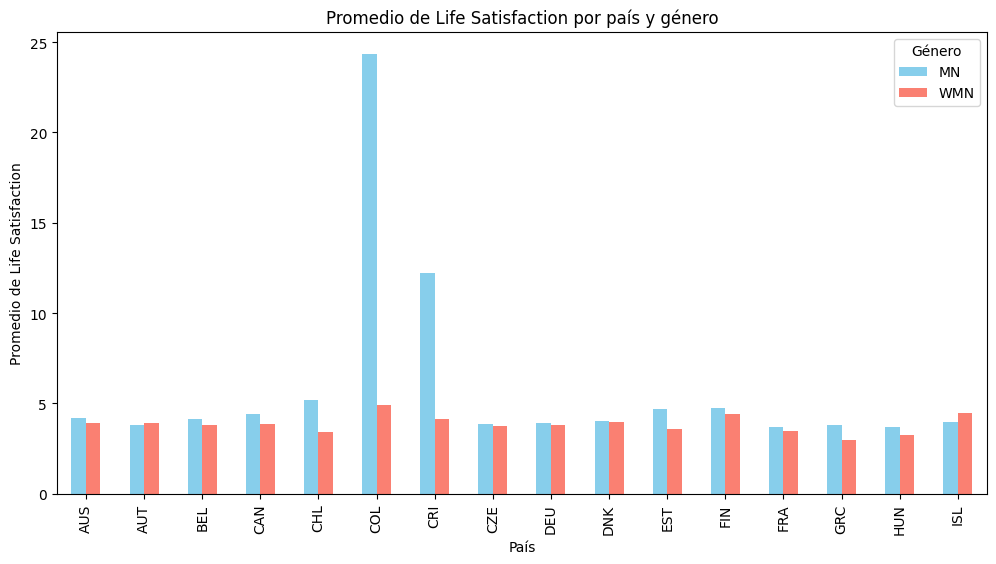

In [36]:
#make bar chart to see the percentage of life satisfaction using WMN and MN by country
# Agrupar por país y género
df_grouped = df.groupby(["LOCATION", "INEQUALITY"])["Value"].mean().unstack()

# Crear un gráfico de barras
df_grouped.plot(kind="bar", figsize=(12, 6), color=["skyblue", "salmon"])
plt.xlabel("País")
plt.ylabel("Promedio de Life Satisfaction")
plt.title("Promedio de Life Satisfaction por país y género")
plt.legend(title="Género")
plt.show()

In [34]:
# valor mas alte de la columna Value
df["Value"].max()

43.0

In [35]:
# valor value correspondiente a LOCATION == "COL"
df[df["LOCATION"] == "COL"]

,INEQUALITY,LOCATION,INDICATOR,MEASURE,Value
13,WMN,COL,SW_LIFS,L,5.7
14,MN,COL,SW_LIFS,L,5.7
44,WMN,COL,PS_REPH,L,4.1
45,MN,COL,PS_REPH,L,43.0
